# BM 336546 - HW2

# Part I: Theory Questions

$Question 1$:
Both evaluation metrics are important, but the model accuracy method can be misleading. For instance we might consider a classification algorithm as an accurate one, based on an accuracy of 90%. However, if the data was imbalanced with a ratio of 90%-10%, even a naive classifier would achieve that perofromance. And in that case, the model performance would be more accurate. 

$Question 2$: Each choice has it's pros and cons, if we use all the features the classfier will be more accurate and give better diagnosis, but the complexity will increase, too many features may obstruct interpretability which will make it a challenge to visualize the data, as the number of features increases we need exponentially more examples in order to ensure our model will generalize well and it will cost us more for collecting many features, etc.
And if we use only BP and BMI features, witch and I assume the most important features and have the most direct effect on the classification of the data, there wont be any problem of visualization, and the quantity of the required examples will reduce with the computing times. But we may lose a valuable information that the two features may not provide, thus our diagnosis wont be the most optimal one using this classifier. However, It is likely that if we choose to use all of the features, then perform feature sellection we will get to the point that we onlly have left these two features (BP and BMI). So we choose to use only them. 

$Question 3$: Here we have a complex problem. On one hand, the biopsies are similar, and it is difficult to distinguish them from the human eye,
or by just looking at the features. Meaning that the data is not easily seperable or not clearly linearly seperable. On the other hand, there are dozens of features,
and it is not clear wether they are all relevant. Therefore, applying non-linear SVM can get very heavy and inefficient.
Therefore, it is not clear what model fits the data best, but the methodolgy should be as follows: First, Logistic Regression should be applied. Beacuse it is the simpler calssifier,
and it is computationaly less heavy. And it might turn out to be good enough. If the perofmances were not satisfying, linear SVM should be applied.
If the results were still unsatisfying, non-linear SVM should be applied. Because it is a more complex model, so it will yield better results in case the data was non-linearly seperable,
however it is computatnioly more heavy.

$Question 4$: Logistic Regression (LR) and linear SVM are both linear models to calssify linearly seperable data. However, their algorithms work on different things. LR works with a probabilistic function. 
It seeks to maximize the probabilty that a data is correctly calssified. The SVM on the other hand optimizes a geomteric problem. It seeks to find the decision boundary that is geometrically
far from the classes- find maximum margin.
As for the hyper-parameters, in LR the hyper-parameter is the lambda. It is a regularization parameter. Meaning that it affects penalization, aiming to avoid over training and over fitting.
The smaller the lambda, the less regularization. lambda=0 is without regularization. The greater the lambda, the greater the regularization and thus the greater the cost function of the training. 
Therefore we seek an optimum value of lambda that avoides overfitting and does not greatly increase the cost function. In SVM there are two hyper-parameters: C and gamma. C is the Capacity paarameter,
and it determens how much to penalize miss-classifications in the training set. It is the regularization parameter. It goes like 1/lambda. It affects how much to fit the training set.
The greater the C, the less regularization. Here too, we seek an optimum of parameters.
Gamma is a penalizing parameters only in non-linear kernels. Therefore it is not relevant to linear SVM. The hogher the gamma the more we fit the training set. Very high gamma leads to overfitting. 

# Part II: Coding Assignment
$section 1$- Data loading

In T1D all the data were saved, then we will separate between the diagnosis "Diagnosis" and the features "T1D_features".  

In [296]:
# Loading Data

import sys
import pandas as pd 
import numpy as np
from pathlib import Path
import random
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import hinge_loss
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
%load_ext autoreload


T1D_dataset = pd.read_csv("HW2_data.csv") 
T1D = T1D_dataset[['Age','Gender','Increased Urination','Increased Thirst','Sudden Weight Loss','Weakness','Increased Hunger',
                            'Genital Thrush','Visual Blurring','Itching','Irritability','Delayed Healing','Partial Paresis',
                            'Muscle Stiffness','Hair Loss','Obesity','Family History']]
Diagnosis = T1D_dataset[['Diagnosis']]

random.seed(10)  # fill your seed number here
T1D_features=T1D.copy()
T1D.sample(n=5, random_state=5)#Display data of five random patient 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Family History
197,62,Male,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,No,Yes,No,0
330,40,Male,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,1
261,30,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
336,30,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1
539,67,Male,No,No,No,No,NaN,No,Yes,NaN,No,No,No,NaN,No,No,0


After loading the Data and inspecting the information of five random patient, we choose to fill in 
the missing data by modeling each feature with missing values as a function of other features in a round-robin fashion using "IterativeImputer" class. In this way we do not lose data and get to keep all the samples, and we filled the values sophisticatedly, while taking into consideration the correlation between the features.


In [297]:
T1Dc_features={}
T1Dc_features_dum = pd.get_dummies(data=T1D_features, drop_first=True)
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0)
T1Dc_features_dfit=imp_mean.fit_transform (np.array(T1Dc_features_dum))
T1Dc_features_dfit=np.int_(T1Dc_features_dfit)
T1Dc_features=pd.DataFrame(T1Dc_features_dfit)
T1Dc_features.iloc[:,2]=np.where(T1Dc_features.iloc[:,2]==1, 'Male',T1Dc_features.iloc[:,2])
T1Dc_features.iloc[:,2]=np.where(T1Dc_features.iloc[:,2]=='0', 'Female',T1Dc_features.iloc[:,2])
T1Dc_features.iloc[:,3:17]=np.where(T1Dc_features.iloc[:,3:17]==1, 'Yes',T1Dc_features.iloc[:,3:17])
T1Dc_features.iloc[:,3:17]=np.where(T1Dc_features.iloc[:,3:17]=='0', 'No',T1Dc_features.iloc[:,3:17])

i=['Age','Family History','Gender','Increased Urination','Increased Thirst','Sudden Weight Loss','Weakness','Increased Hunger',
                            'Genital Thrush','Visual Blurring','Itching','Irritability','Delayed Healing','Partial Paresis',
                            'Muscle Stiffness','Hair Loss','Obesity']
T1Dc_features = T1Dc_features.set_axis(i, axis='columns', inplace=False)

T1Dc_features=pd.DataFrame(T1Dc_features)
T1Dc_features.sample(n=5, random_state=5)

,Age,Family History,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity
197,62,0,Male,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,No,Yes,No
330,40,1,Male,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes
261,30,0,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No
336,30,1,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No
539,67,0,Male,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No


Now that we filled the missing data, we will work with the "T1Dc_features".
Let's make sure that the missing data were filled.
we picked a feature that we know for sure that it had some missing data and we filled the original features's empty cells with the word 'null', and compared the distribution of the values before and after. We can see that the preprocessing was fulfilled.


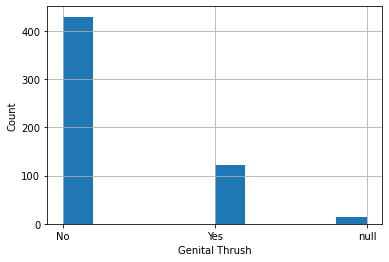

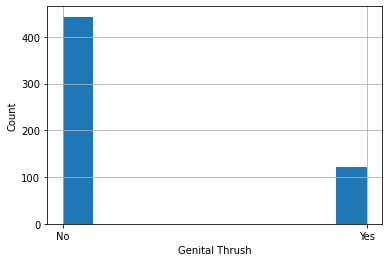

In [298]:
# Make sure that we have no Null values left
feat = 'Genital Thrush' #pick a feature
Q = pd.DataFrame(T1D[feat])

idx_na = Q.index[Q[feat].isnull()].tolist()

for i in idx_na:
    Q.loc[idx_na] = "null"

Q[feat].hist(bins = 10)
plt.xlabel('Genital Thrush')
plt.ylabel('Count')
plt.show()

T1Dc_features[feat].hist(bins = 10)
plt.xlabel('Genital Thrush')
plt.ylabel('Count')
plt.show()

Given the mostly binary nature of this dataset, we think that other than filling the missing data there is nomore preprocessing needed.

$Section 2$: test-train split of 20% test

In [299]:
#test-train split

orig_feat = T1Dc_features.columns.values
X_train, X_test, y_train, y_test = train_test_split(T1Dc_features, np.ravel(Diagnosis), test_size=0.2, random_state=0, stratify=np.ravel(Diagnosis))


$Section 3$: Detailed visualization and exploration of the data.

$3a$- Look at the distribution of the features, we can see that it is similar 
between test and train, and the differences are not significant.    

In [300]:
#3-a
tbl1=[]
tbl1={'Train %':((X_train.iloc[:,1:]=='Yes') | 
                 (X_train.iloc[:,1:]=='Male') | (X_train.iloc[:,1:]==1))
      .sum()*100/len(X_train)}
tbl1['Test %']=((X_test.iloc[:,1:]=='Yes') | (X_test.iloc[:,1:]=='Male') 
                | (X_test.iloc[:,1:]==1)).sum()*100/len(X_test)
tbl1['Delta %']=tbl1['Train %']-tbl1['Test %']
print(pd.DataFrame(tbl1))

                       Train %     Test %   Delta %
Family History       50.221239  52.212389 -1.991150
Gender               63.938053  62.831858  1.106195
Increased Urination  48.230088  48.672566 -0.442478
Increased Thirst     44.026549  38.053097  5.973451
Sudden Weight Loss   39.159292  45.132743 -5.973451
Weakness             56.415929  60.176991 -3.761062
Increased Hunger     44.026549  41.592920  2.433628
Genital Thrush       20.575221  25.663717 -5.088496
Visual Blurring      45.796460  41.592920  4.203540
Itching              48.230088  44.247788  3.982301
Irritability         23.008850  25.663717 -2.654867
Delayed Healing      46.902655  43.362832  3.539823
Partial Paresis      42.699115  42.477876  0.221239
Muscle Stiffness     35.619469  36.283186 -0.663717
Hair Loss            34.292035  41.592920 -7.300885
Obesity              17.477876  14.159292  3.318584


As for the "Age" feature, we made sure that tha train and the test have 
the same distribution by plotting a histogram of it's values. And we can see that they have 
approximately the same distribution.

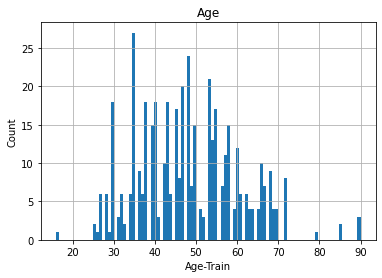

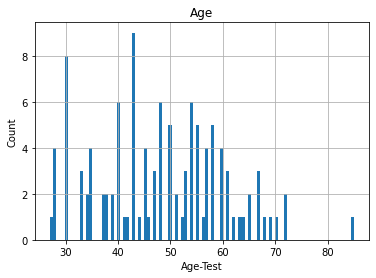

In [301]:
#compare Age distribution
feat = 'Age'
Q=X_train[[feat]]
Q.hist(bins = 100)

plt.xlabel('Age-Train')
plt.ylabel('Count')
plt.show()

q=X_test[['Age']]
q.hist(bins = 100)

plt.xlabel('Age-Test')
plt.ylabel('Count')
plt.show()

$3a-i$- An imbalance of features between train and test could lead to poor training of the model, which will lead to poor classification of the data. And that might impair sensitivity and pecificity of the model, because the classifier will predict a wrong diagnosis of the test data.   

$3a-ii$- If the feature with the an imbalance is not so important, and has low effect on the final diagnosis then it wont matter much that it is an imbalanced.
otherwise, we have to make sure that it is balanced and to re-split the original data while maintaining balance.

$3b$- We will provide graphs that shows the relationship between feature and label:

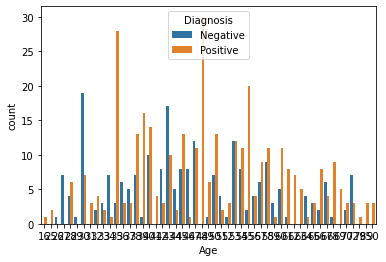

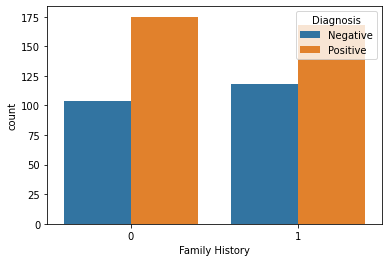

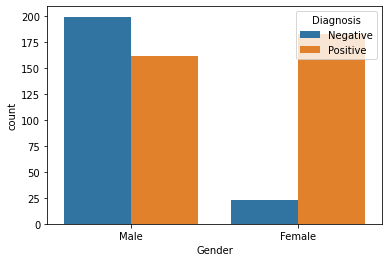

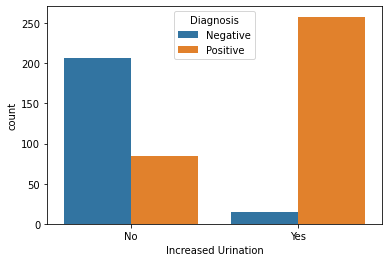

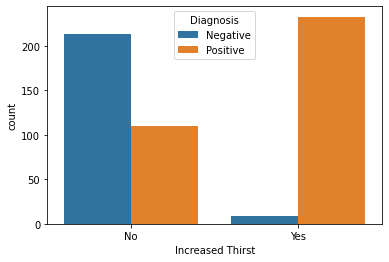

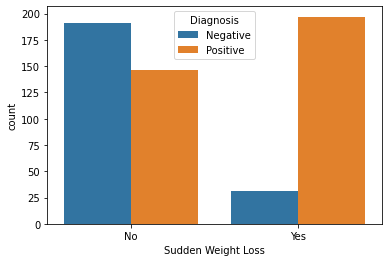

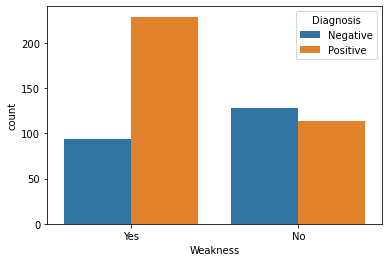

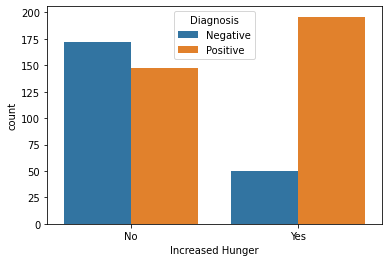

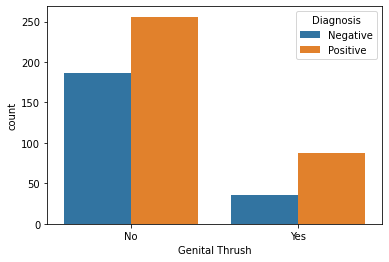

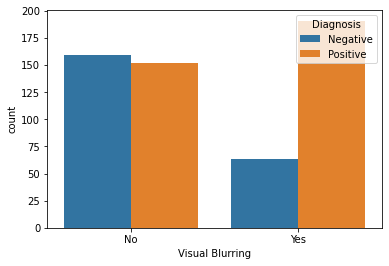

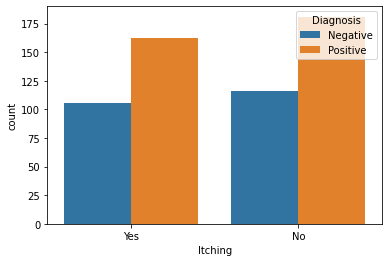

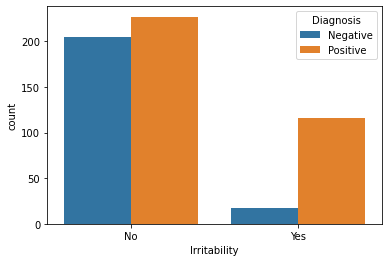

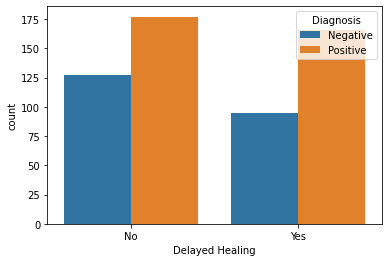

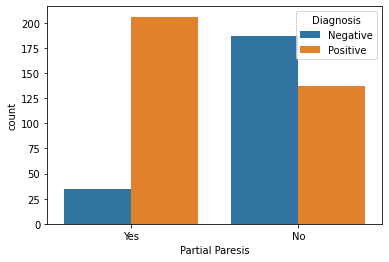

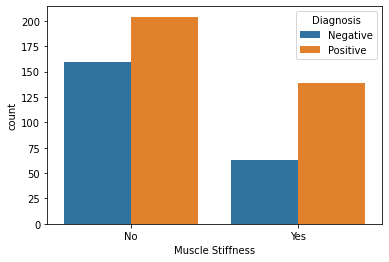

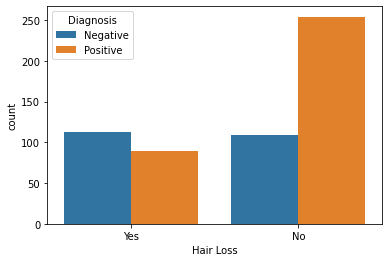

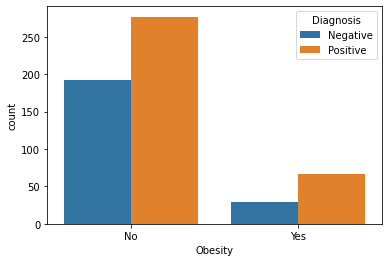

In [302]:
data_plotting=T1Dc_features.copy()
data_plotting['Diagnosis']=Diagnosis
features = T1Dc_features.columns.values
for feat in features:
    ax = sns.countplot(x=feat, hue="Diagnosis", data=data_plotting) 
   
    plt.show()
    

$3c$- Let's take a look at the labels distribution:

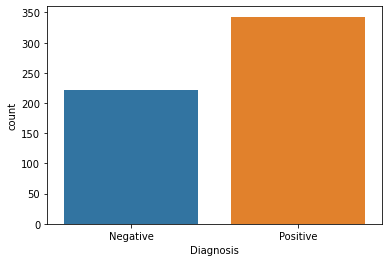

Negative samples account for 39.29% of the data.
Positive samples account for 60.71% of the data.


In [303]:
g = sns.countplot(x = 'Diagnosis', data = Diagnosis)
g.set(xticklabels=['Negative','Positive'])
plt.show()
idx_1 = (Diagnosis == 'Negative').index[(Diagnosis == 'Negative')['Diagnosis'] == True].tolist()
idx_2 = (Diagnosis == 'Positive').index[(Diagnosis == 'Positive')['Diagnosis'] == True].tolist()

print("Negative samples account for " + str("{0:.2f}".format(100 * len(idx_1) / len(Diagnosis))) + "% of the data.")
print("Positive samples account for " + str("{0:.2f}".format(100 * len(idx_2) / len(Diagnosis))) + "% of the data.")

We can see that most of the samples were labeled as Positive.

$3d$- (i) Yes, it was menssioned before that genetics is one of the possible causes of T1D, but if we look at the graphs that illustrates the relationship between features and diagnosis which are the most informative, we can see that the Family history does not really correlate with the diagnosis.
Other than that the features are relatively compatible with the known symptoms of the disease.

(ii) According to the graphs above we can see that Increased Urination, Increased Thirst, Weakness and Obesity features are important to the model becausewith them we can discriminate between different diagnosis.   
Especially that undiagnosed or untreated type 1 diabetes can cause weight loss. Glucose builds up in the bloodstream if insulin isn't available to move it into the body's cells. When glucose levels become high, the kidneys work to get rid of unused sugar through urine (pee).This causes weight loss due to dehydration and loss of calories from the sugar that wasn't used as energy.

$Section 4$ - In order to create a Hot Vector, we will convert 'yes' into 1 and 'no' into 0 in X_train, X_test, y_train and y_test.

In [304]:
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)
y_train = np.ravel(pd.get_dummies(data=y_train, drop_first=True))
y_test = np.ravel(pd.get_dummies(data=y_test, drop_first=True))

In [305]:
def plot_radar(clf, clf_type):
    labels=np.array(['Accuracy', 'F1', 'PPV', 'Sensitivity', 'AUROC']) 
    score_mat_train = np.stack((clf.cv_results_['mean_train_accuracy'], clf.cv_results_['mean_train_f1'],
                               clf.cv_results_['mean_train_precision'], clf.cv_results_['mean_train_recall'],
                               clf.cv_results_['mean_train_roc_auc']), axis=0)
    score_mat_val = np.stack((clf.cv_results_['mean_test_accuracy'], clf.cv_results_['mean_test_f1'],
                               clf.cv_results_['mean_test_precision'], clf.cv_results_['mean_test_recall'],
                               clf.cv_results_['mean_test_roc_auc']), axis=0)


    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

    angles=np.concatenate((angles,[angles[0]]))
    cv_dict = clf.cv_results_['params']
    fig=plt.figure(figsize=(18,14))
    if 'svm__gamma' in cv_dict[0]:
        new_list = [(i, item) for i, item in enumerate(cv_dict) if
                    item["svm__kernel"] == clf_type[0] and item["svm__gamma"] == clf_type[1]]
    else:
        new_list = [(i, item) for i, item in enumerate(cv_dict) if
                    item["svm__kernel"] == clf_type[0]]
    for idx, val in enumerate(new_list):
        ax = fig.add_subplot(1, len(new_list), 1+idx, polar=True)
        rel_idx, rel_dict = val
        stats_train = score_mat_train[:, rel_idx]
        stats_train=np.concatenate((stats_train,[stats_train[0]]))
        ax.plot(angles, stats_train, 'o-', linewidth=2)
        ax.fill(angles, stats_train, alpha=0.25)
        stats_val = score_mat_val[:, rel_idx]
        stats_val=np.concatenate((stats_val,[stats_val[0]]))
        ax.plot(angles, stats_val, 'o-', linewidth=2)
        ax.fill(angles, stats_val, alpha=0.25)
        ax.set_thetagrids(angles[0:-1] * 180/np.pi, labels)
        if idx == 0:
            ax.set_ylabel(clf_type[0], fontsize=18)
        ax.set_title('C = %.3f' % (rel_dict['svm__C']))
        if 'svm__gamma' in cv_dict[0]:
            ax.set_xlabel('$\gamma = %s $' % (rel_dict['svm__gamma']))
        ax.set_ylim([0,1])
        ax.legend(['Train','Validation'])
        ax.grid(True)
        
    plt.show()

$section 5 $- Now we will build and optimize Machine Learning Models:

In [306]:
#First let's generate 5K- cross fold
n_splits = 5 #5k cross fold
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
svc = SVC(probability=True)

In [307]:
# Define two functions that returns SVM Machine Learning Models, Linear and nonlinear ones
def SVM_lin_model(X_train, y_train):
    C = np.array([0.001, 0.01, 1, 10, 100, 1000])
    pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
    svm_lin = GridSearchCV(estimator=pipe, param_grid={'svm__C': C, 'svm__kernel': ['linear']},cv=skf,
                       scoring=['accuracy','f1','precision','recall','roc_auc'], 
                      refit='roc_auc', verbose=3, return_train_score=True)
    svm_lin.fit(X_train, y_train)
    return svm_lin
    
def SVM_nonlin_model(X_train, y_train):
    C = np.array([1, 100, 1000])#, 10, 100, 1000])
    pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
    svm_nonlin = GridSearchCV(estimator=pipe, param_grid={'svm__C': C, 'svm__kernel': ['rbf', 'poly'],
                                                      'svm__gamma': ['auto', 'scale']},
                       scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
                       refit='roc_auc', verbose=3, return_train_score=True)
    svm_nonlin.fit(X_train, y_train)
    return svm_nonlin

Now we will learn our first linear Model - using SVM algorithm.

In [308]:
# Model 1 - lin_SVM
svm_lin = SVM_lin_model(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, accuracy=(train=0.878, test=0.824), f1=(train=0.904, test=0.864), precision=(train=0.863, test=0.810), recall=(train=0.950, test=0.927), roc_auc=(train=0.954, test=0.920), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, accuracy=(train=0.834, test=0.868), f1=(train=0.875, test=0.900), precision=(train=0.805, test=0.831), recall=(train=0.959, test=0.982), roc_auc=(train=0.956, test=0.974), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, accuracy=(train=0.870, test=0.833), f1=(train=0.898, test=0.867), precision=(train=0.856, test=0.831), recall=(train=0.945, test=0.907), roc_auc=(train=0.957, test=0.932), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, accuracy=(train=0.820, test=0.856), f1=(train=0.867, test=0.891), precision=(train=0.785, test=0.828), recall=(train=0.968, test=0.964), roc_auc=(train=0.958, test=0.955), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.903, test=0.879), f1=(train=0.917, test=0.897), precision=(train=0.955, test=0.923), recall=(train=0.881, test=0.873), roc_auc=(train=0.978, test=0.962), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.906, test=0.901), f1=(train=0.921, test=0.914), precision=(train=0.938, test=0.960), recall=(train=0.904, test=0.873), roc_auc=(train=0.973, test=0.982), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   44.5s finished


We will Choose the best linear model and name it as `best_svm_lin`. In addition, we will print the parameters adequate to the best classifier.

In [309]:
best_svm_lin = svm_lin.best_estimator_
print(svm_lin.best_params_)

{'svm__C': 10.0, 'svm__kernel': 'linear'}


Now let's look at the performances as a function of missclassification penalties:

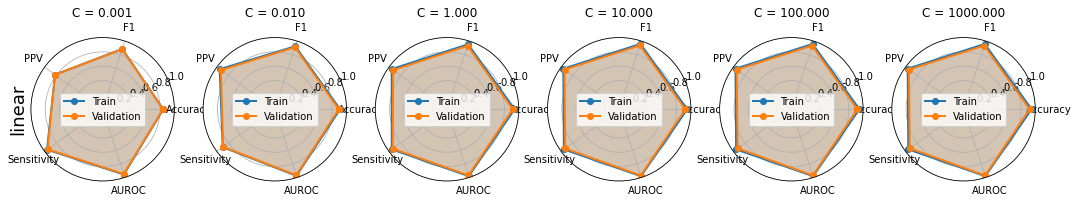

In [310]:
clf_type = ['linear']
plot_radar(svm_lin,clf_type)

*Linear model 2* - Logistic Regression

First we need to find the best hyperparameters for our model, therefor we will choose $l_2$ for regularization and *K-fold cross validation* to have more robustic conclusions.
We will calculate and plot the loss over training and testing sets along given `lmbda`, where the standard deviation is used as the error . $\lambda$ axis is scaled by the logarithm with base of 10 when plotted.

6/6 lambda values, processed folds: 100%|████████████████████████████████████████████████| 5/5 [00:00<00:00, 54.49it/s]


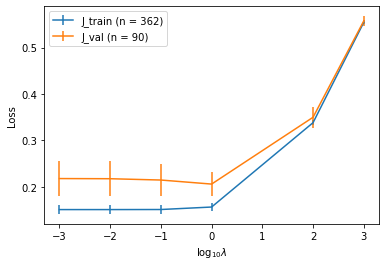

In [311]:
pen = 'l2'
CC = np.array([0.001, 0.01, 1, 10, 100, 1000]) #1/lambda
scaler = StandardScaler()

J_train = np.zeros((2,len(CC)))
J_val = np.zeros((2,len(CC)))

for idx, C in enumerate(CC):
    
    #--------------------------Impelment your code here:-------------------------------------
    log_reg = LogisticRegression(random_state=5, penalty='l2', C = C, max_iter=2000,solver='lbfgs')
    #----------------------------------------------------------------------------------------
    with tqdm(total=n_splits, file=sys.stdout, position=0, leave=True) as pbar:
        h = 0 # index per split per lambda
        J_train_fold = np.zeros(n_splits)
        J_val_fold = np.zeros(n_splits)

        for train_index, val_index in skf.split(X_train, y_train):
            pbar.set_description('%d/%d lambda values, processed folds' % ((1 + idx), len(CC)))
            pbar.update()
            #--------------------------Impelment your code here:-------------------------------------
            x_train_fold, x_val_fold = X_train.to_numpy()[train_index,:], X_train.to_numpy()[val_index,:]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
            x_train = scaler.fit_transform(x_train_fold)
            x_val = scaler.transform(x_val_fold)
            log_reg.fit(x_train, y_train_fold)
            y_pred_train = log_reg.predict_proba(x_train)
            y_pred_val = log_reg.predict_proba(x_val)
            J_train_fold[h]=log_loss(y_train_fold,y_pred_train)
            J_val_fold[h]=log_loss(y_val_fold,y_pred_val)
#             #----------------------------------------------------------------------------------------
            h += 1
        #--------------------------Impelment your code here:-------------------------------------
        J_train[:,idx] = [np.mean(J_train_fold),np.std(J_train_fold)]
        J_val[:,idx] = [np.mean(J_val_fold),np.std(J_val_fold)]

plt.errorbar(np.log10(1/CC), J_train[0,:], yerr=J_train[1,:])
plt.errorbar(np.log10(1/CC), J_val[0,:], yerr=J_val[1,:]) 
plt.xlabel('$\log_{10}\lambda$')
plt.ylabel('Loss')
plt.legend(['J_train (n = ' + str(x_train_fold.shape[0]) + ')', 'J_val (n = ' + str(x_val_fold.shape[0]) + ')'])

Because of the tradeoff between minimum LOSS and maximum performance we need to compromise and choose lambda that gives us good enough values in both, therefor we choose best_$\lambda$=1 so C=1.
Now we will train our model accordingly.

In [312]:
log_reg = LogisticRegression(random_state=5, penalty='l2', C = 1, max_iter=2000,solver='lbfgs')
# LOSS=J_train[0,0]
# log_reg = LogisticRegression(random_state=10)
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(C=1, max_iter=2000, random_state=5)

$5a-ii$: nonlinear model-SVM calssifier

Now we would look for a **nonlinear** SVM calssifier. Will use the kernels `rbf` and `poly`, for $\gamma$, `auto` and `scale`. The order of the polynom we choose it to be 3 (so it won't take more than several minutes)

In [313]:
svm_nonlin = SVM_nonlin_model(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] svm__C=1, svm__gamma=auto, svm__kernel=rbf ......................
[CV]  svm__C=1, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.992, test=0.967), f1=(train=0.993, test=0.972), precision=(train=0.991, test=0.981), recall=(train=0.995, test=0.964), roc_auc=(train=0.999, test=0.993), total=   0.0s
[CV] svm__C=1, svm__gamma=auto, svm__kernel=rbf ......................
[CV]  svm__C=1, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.989, test=0.967), f1=(train=0.991, test=0.973), precision=(train=0.991, test=0.964), recall=(train=0.991, test=0.982), roc_auc=(train=0.999, test=0.994), total=   0.0s
[CV] svm__C=1, svm__gamma=auto, svm__kernel=rbf ......................
[CV]  svm__C=1, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.986, test=0.911), f1=(train=0.989, test=0.925), precision=(train=0.986, test=0.942), recall=(train=0.991, test=0.907), roc_auc=(train=0.999, test=0.991), total=   0.0s
[CV] svm__C=1, svm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=1, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.989, test=0.989), f1=(train=0.991, test=0.991), precision=(train=0.991, test=1.000), recall=(train=0.991, test=0.982), roc_auc=(train=1.000, test=0.999), total=   0.0s
[CV] svm__C=1, svm__gamma=auto, svm__kernel=poly .....................
[CV]  svm__C=1, svm__gamma=auto, svm__kernel=poly, accuracy=(train=0.992, test=0.967), f1=(train=0.993, test=0.972), precision=(train=0.991, test=0.981), recall=(train=0.995, test=0.964), roc_auc=(train=1.000, test=0.995), total=   0.0s
[CV] svm__C=1, svm__gamma=auto, svm__kernel=poly .....................
[CV]  svm__C=1, svm__gamma=auto, svm__kernel=poly, accuracy=(train=0.989, test=0.956), f1=(train=0.991, test=0.964), precision=(train=0.991, test=0.964), recall=(train=0.991, test=0.964), roc_auc=(train=1.000, test=0.992), total=   0.0s
[CV] svm__C=1, svm__gamma=auto, svm__kernel=poly .....................
[CV]  svm__C=1, svm__gamma=auto, svm__kernel=poly, accuracy=(train=0.986, tes

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.2s finished


Let's find the best estimator and name it as best_svm_nonlin.

In [314]:
best_svm_nonlin = svm_nonlin.best_estimator_
print(svm_nonlin.best_params_)

{'svm__C': 100, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}


As we can see the rbf kernal is the best in our situation. with C=100.

Now we will plot The performances as a function of missclassification penalties for different kernels and $\gamma$.

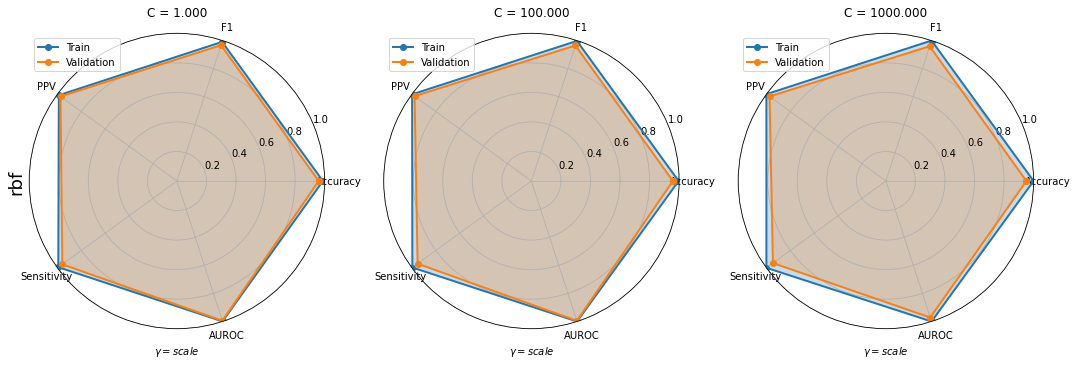

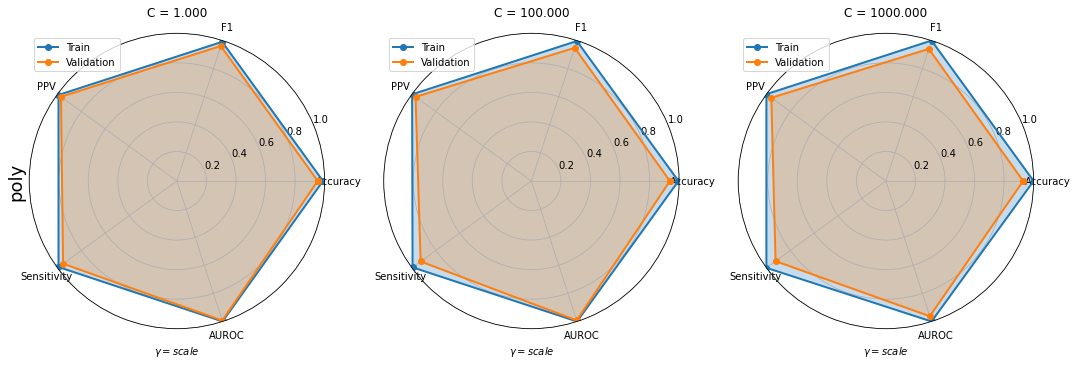

In [315]:
clf_type = ['rbf', 'scale']
plot_radar(svm_nonlin, clf_type)
clf_type = ['poly', 'scale']
plot_radar(svm_nonlin, clf_type)

Now we will build a function *Evaluation_metrics*, that calculates and presents some metrics of statistical performance and plot the confusion matrix, of a given model. 

In [316]:
calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]

def Evaluation_metrics(x_test,y_test,model,method):
    y_pred_test = model.predict(x_test) #NOTICE NOT TO USE THE STANDARDIZED DATA.
    y_pred_proba_test = model.predict_proba(x_test)
    #--------------------------Impelment your code here:-------------------------------------
    if method=='log_reg' :
        LOSS=log_loss(y_test,y_pred_test)
        print(f'LOSS is {LOSS:.2f}')
    elif method=='SVM': 
        y_pred_test_sc=np.where(y_pred_test==0, -1, y_pred_test)
        y_test_sc=np.where(y_test==0, -1, y_test)
        LOSS=hinge_loss(y_test_sc,y_pred_test_sc)
        print(f'LOSS is {LOSS:.2f}')

    TN = calc_TN(y_test, y_pred_test)
    TP = calc_TP(y_test, y_pred_test)
    FN = calc_FN(y_test, y_pred_test)
    FP = calc_FP(y_test, y_pred_test)
    Se = TP/(TP+FN)
    Sp = TN/(TN+FP)
    PPV = TP/(TP+FP)
    NPV = TN/(TN+FN)
    Acc = (TP+TN)/(TP+TN+FP+FN)
    F1 = (2*PPV*Se)/(PPV+Se)
    print(f'Sensitivity is {Se:.2f}')
    print(f'Specificity is {Sp:.2f}')
    print(f'PPV is {PPV:.2f}')
    print(f'NPV is {NPV:.2f}')
    print(f'Accuracy is {Acc:.2f}')
    print(f'F1 is {F1:.2f}')
    plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)
    plt.grid(False)
    #------------------------------------------------------------------------------------------
    print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

$5b$: Now we will evaluate the metrics of the train and test sets of the three models.

*Linear 1- SVM*

*test set*
LOSS is 0.19
Sensitivity is 0.94
Specificity is 0.84
PPV is 0.90
NPV is 0.90
Accuracy is 0.90
F1 is 0.92
AUROC is 0.956
*train set*
LOSS is 0.11
Sensitivity is 0.95
Specificity is 0.94
PPV is 0.96
NPV is 0.92
Accuracy is 0.95
F1 is 0.96
AUROC is 0.979


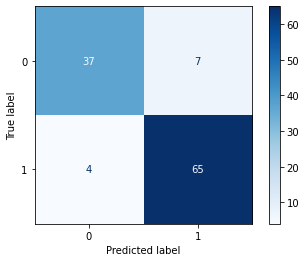

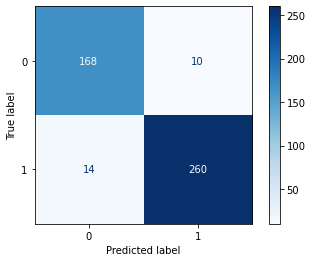

In [317]:
print('*test set*')
Evaluation_metrics(X_test,y_test,best_svm_lin,method='SVM')
print('*train set*')
Evaluation_metrics(X_train,y_train,best_svm_lin,method='SVM')

*Linear 2 - LogisticRegression*

*test set*
LOSS is 3.06
Sensitivity is 0.96
Specificity is 0.84
PPV is 0.90
NPV is 0.93
Accuracy is 0.91
F1 is 0.93
AUROC is 0.966
*train set*
LOSS is 2.22
Sensitivity is 0.94
Specificity is 0.93
PPV is 0.95
NPV is 0.91
Accuracy is 0.94
F1 is 0.95
AUROC is 0.983


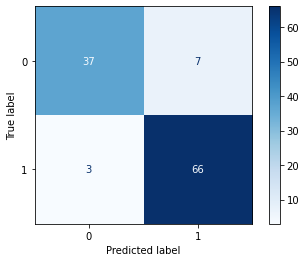

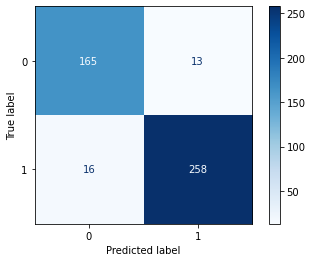

In [318]:
print('*test set*')
Evaluation_metrics(X_test_scaled,y_test,log_reg,method='log_reg')
print('*train set*')
Evaluation_metrics(X_train_scaled,y_train,log_reg,method='log_reg')

*Non-linear SVM*

*test set*
LOSS is 0.09
Sensitivity is 0.97
Specificity is 0.93
PPV is 0.96
NPV is 0.95
Accuracy is 0.96
F1 is 0.96
AUROC is 0.983
*train set*
LOSS is 0.01
Sensitivity is 1.00
Specificity is 0.99
PPV is 0.99
NPV is 1.00
Accuracy is 1.00
F1 is 1.00
AUROC is 1.000


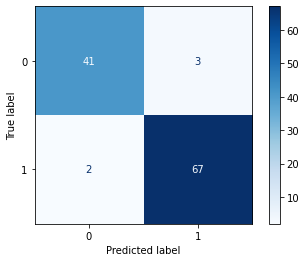

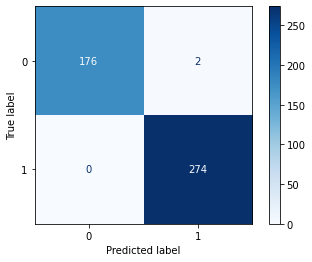

In [319]:
print('*test set*')
Evaluation_metrics(X_test,y_test,best_svm_nonlin,method='SVM')
print('*train set*')
Evaluation_metrics(X_train,y_train,best_svm_nonlin,method='SVM')

section 6

We now apply random forest classifier to explore the feature importance


Sensitivity is 0.93
Specificity is 0.93
PPV is 0.96
NPV is 0.89
Accuracy is 0.93
F1 is 0.94
AUROC is 0.979


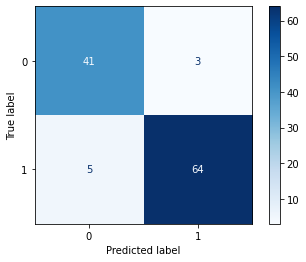

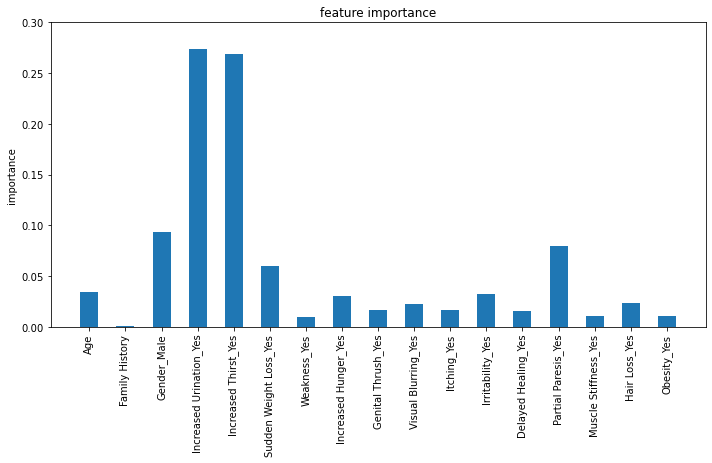

In [320]:
#section 6-random forest
rfc = Pipeline(steps=[('scale', StandardScaler()), ('RFC', RandomForestClassifier(max_depth=4, random_state=0, criterion='gini'))])
rfc.fit(X_train, y_train)
# Evaluation_metrics(X_train, X_test, rfc,'rf')
Evaluation_metrics(X_test,y_test,rfc,'rf')

#feature importance
importance = rfc.named_steps["RFC"].feature_importances_
features=X_train.columns.values
x = np.arange(len(features))
width = 0.5  # the width of the bars
fig, axs = plt.subplots(figsize=(10,5))
axs.bar(x, importance, width)
axs.set(xticks=x, xticklabels=features, ylabel='importance', title='feature importance')
fig.tight_layout()
plt.ylim(0,0.3)
plt.xticks(rotation=90)
plt.show()


6.a.i As can be seen from the bar plot above, whoch presents the features importance from the random forest classifier, the two most important features are the "Increased Urination" and the "Increased Thirst"

6.a.ii This result does indeed match with the features exploration we did previously. From the barplots exploring each feature it can be clearly noticed that in these two features, the YES answers were mainly governed by Positive labels and very few Negatives, while the NO answers were mainly governed by Negative labels with very few Positives.

section 7:

Before aplying PCA, data should be centered around zero. Therefore, we first scale the data, then perform dimensionality reduction to 2 Principle Components:

In [321]:
#7a-

#scaling
scale=StandardScaler()

X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)


n_components = 2
pca=PCA(n_components,whiten=True)
X_train_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)

In [322]:
def plt_2d_pca(X_pca,y):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, aspect='equal')
    ax.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='b')
    ax.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='r')
    ax.legend(('Negative','Positive'))
    ax.plot([0], [0], "ko")
    ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.set_xlabel('$U_1$')
    ax.set_ylabel('$U_2$')
    ax.set_title('2D PCA')

7(a) Now, plotting the data with 2d plots, based on the 2 prinicple components we found:

Text(0.5, 1.0, '2D PCA - test')

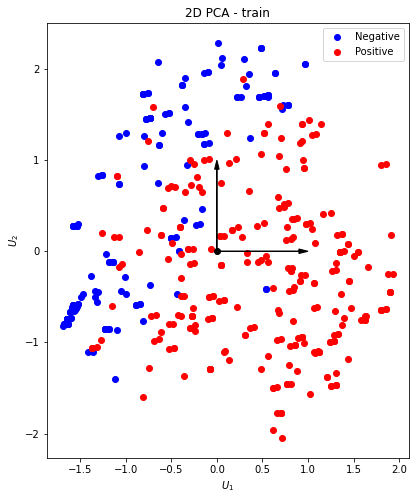

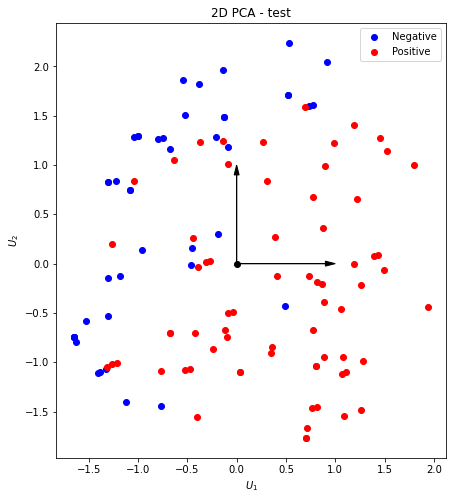

In [323]:
#train set
plt_2d_pca(X_train_pca,y_train)
plt.title('2D PCA - train')

#test set
plt_2d_pca(X_test_pca,y_test)
plt.title('2D PCA - test')

7(b) As can be seen in the plots above, when reduced to two features, data is seperable, though not perfectly seperable. It is possible to find a line that seperates the Negative from Positive! However, since data is not completely seperable, and there is some overlap between the two labels, , it will still result in misdetections.

7(c) We now train the dimensionality-reduced data on the models above (linear and non-linear). 
Since linear SVM previously gave better results than Logistic Regression, we will use linear SVM as the linear model

In [324]:
#7c

# Model 1 - SVM
svm_lin_pca = SVM_lin_model(X_train_pca, y_train)
best_svm_lin_pca = svm_lin_pca.best_estimator_
print(svm_lin_pca.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, accuracy=(train=0.607, test=0.604), f1=(train=0.755, test=0.753), precision=(train=0.607, test=0.604), recall=(train=1.000, test=1.000), roc_auc=(train=0.940, test=0.901), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, accuracy=(train=0.607, test=0.604), f1=(train=0.755, test=0.753), precision=(train=0.607, test=0.604), recall=(train=1.000, test=1.000), roc_auc=(train=0.930, test=0.967), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, accuracy=(train=0.608, test=0.600), f1=(train=0.756, test=0.750), precision=(train=0.608, test=0.600), recall=(train=1.000, test=1.000), roc_auc=(train=0.946, test=0.908), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.867, test=0.911), f1=(train=0.885, test=0.923), precision=(train=0.930, test=0.980), recall=(train=0.845, test=0.873), roc_auc=(train=0.937, test=0.942), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.856, test=0.856), f1=(train=0.873, test=0.883), precision=(train=0.937, test=0.875), recall=(train=0.817, test=0.891), roc_auc=(train=0.928, test=0.953), total=   0.0s
[CV] svm__C=1.0, svm__kernel=linear ..................................
[CV]  svm__C=1.0, svm__kernel=linear, accuracy=(train=0.861, test=0.835), f1=(train=0.883, test=0.860), precision=(train=0.908, test=0.885), recall=(train=0.858, test=0.836), roc_auc=(train=0.946, test=0.919), total=   0.0s
[CV] svm__C=1.0, svm__kernel=linear ..................................
[CV]  svm__C=1.0, svm__kernel=linear, accuracy=(train=0.853, test=0.890), f1=(train=0.874, test=0.907), precision

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.4s finished


In [325]:
# non-linear model SVM
svm_nonlin_pca = SVM_nonlin_model(X_train_pca, y_train)
best_svm_nonlin_pca = svm_nonlin_pca.best_estimator_
print(svm_nonlin_pca.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] svm__C=1, svm__gamma=auto, svm__kernel=rbf ......................
[CV]  svm__C=1, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.920, test=0.934), f1=(train=0.934, test=0.944), precision=(train=0.936, test=0.962), recall=(train=0.932, test=0.927), roc_auc=(train=0.953, test=0.962), total=   0.0s
[CV] svm__C=1, svm__gamma=auto, svm__kernel=rbf ......................
[CV]  svm__C=1, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.911, test=0.934), f1=(train=0.927, test=0.945), precision=(train=0.927, test=0.945), recall=(train=0.927, test=0.945), roc_auc=(train=0.948, test=0.969), total=   0.0s
[CV] svm__C=1, svm__gamma=auto, svm__kernel=rbf ......................
[CV]  svm__C=1, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.931, test=0.844), f1=(train=0.943, test=0.873), precision=(train=0.949, test=0.857), recall=(train=0.936, test=0.889), roc_auc=(train=0.967, test=0.894), total=   0.0s
[CV] svm__C=1, svm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=1, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.906, test=0.944), f1=(train=0.923, test=0.954), precision=(train=0.919, test=0.963), recall=(train=0.927, test=0.945), roc_auc=(train=0.947, test=0.979), total=   0.0s
[CV] svm__C=1, svm__gamma=auto, svm__kernel=poly .....................
[CV]  svm__C=1, svm__gamma=auto, svm__kernel=poly, accuracy=(train=0.903, test=0.890), f1=(train=0.922, test=0.911), precision=(train=0.897, test=0.895), recall=(train=0.950, test=0.927), roc_auc=(train=0.964, test=0.960), total=   0.0s
[CV] svm__C=1, svm__gamma=auto, svm__kernel=poly .....................
[CV]  svm__C=1, svm__gamma=auto, svm__kernel=poly, accuracy=(train=0.900, test=0.901), f1=(train=0.918, test=0.919), precision=(train=0.914, test=0.911), recall=(train=0.922, test=0.927), roc_auc=(train=0.964, test=0.968), total=   0.0s
[CV] svm__C=1, svm__gamma=auto, svm__kernel=poly .....................
[CV]  svm__C=1, svm__gamma=auto, svm__kernel=poly, accuracy=(train=0.914, tes

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.4s finished


Evaluation parameters:

LOSS is 0.30
Sensitivity is 0.86
Specificity is 0.84
PPV is 0.89
NPV is 0.79
Accuracy is 0.85
F1 is 0.87
AUROC is 0.918


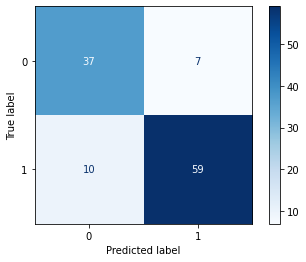

In [326]:
# Linear 
Evaluation_metrics(X_test_pca,y_test,best_svm_lin_pca,method='SVM')

LOSS is 0.30
Sensitivity is 0.86
Specificity is 0.84
PPV is 0.89
NPV is 0.79
Accuracy is 0.85
F1 is 0.87
AUROC is 0.935


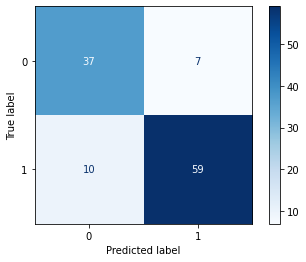

In [327]:
# Non-linear
Evaluation_metrics(X_test_pca,y_test,best_svm_nonlin_pca,'SVM')

7(d) We now train the models above on the best 2 features from section 6 (as derived from Random Forest Classifier). Again, we test a linear SVM model, and non-linears SVM models:

In [328]:
best_2_X_train = X_train[['Increased Urination_Yes', 'Increased Thirst_Yes']]
best_2_X_test = X_test[['Increased Urination_Yes', 'Increased Thirst_Yes']]

# Model 1 - SVM
svm_lin_2 = SVM_lin_model(best_2_X_train, y_train)
best_svm_lin_2 = svm_lin_2.best_estimator_
print(svm_lin_2.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, accuracy=(train=0.607, test=0.604), f1=(train=0.755, test=0.753), precision=(train=0.607, test=0.604), recall=(train=1.000, test=1.000), roc_auc=(train=0.912, test=0.892), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, accuracy=(train=0.607, test=0.604), f1=(train=0.755, test=0.753), precision=(train=0.607, test=0.604), recall=(train=1.000, test=1.000), roc_auc=(train=0.908, test=0.912), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, accuracy=(train=0.608, test=0.600), f1=(train=0.756, test=0.750), precision=(train=0.608, test=0.600), recall=(train=1.000, test=1.000), roc_auc=(train=0.912, test=0.897), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.828, test=0.824), f1=(train=0.843, test=0.833), precision=(train=0.944, test=0.976), recall=(train=0.763, test=0.727), roc_auc=(train=0.908, test=0.912), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.823, test=0.844), f1=(train=0.839, test=0.851), precision=(train=0.938, test=1.000), recall=(train=0.759, test=0.741), roc_auc=(train=0.912, test=0.897), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.818, test=0.867), f1=(train=0.832, test=0.880), precision=(train=0.942, test=0.978), recall=(train=0.744, test=0.800), roc_auc=(train=0.900, test=0.943), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.834, test=0.800), f1=(train=0.845, test=0.827), precisi

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s finished


In [329]:
# non-linear model SVM
svm_nonlin_2 = SVM_nonlin_model(best_2_X_train, y_train)
best_svm_nonlin_2 = svm_nonlin_2.best_estimator_
print(svm_nonlin_2.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] svm__C=1, svm__gamma=auto, svm__kernel=rbf ......................
[CV]  svm__C=1, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.875, test=0.868), f1=(train=0.894, test=0.885), precision=(train=0.926, test=0.939), recall=(train=0.863, test=0.836), roc_auc=(train=0.911, test=0.902), total=   0.0s
[CV] svm__C=1, svm__gamma=auto, svm__kernel=rbf ......................
[CV]  svm__C=1, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.870, test=0.890), f1=(train=0.889, test=0.902), precision=(train=0.917, test=0.979), recall=(train=0.863, test=0.836), roc_auc=(train=0.906, test=0.915), total=   0.0s
[CV] svm__C=1, svm__gamma=auto, svm__kernel=rbf ......................
[CV]  svm__C=1, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.878, test=0.856), f1=(train=0.897, test=0.871), precision=(train=0.927, test=0.936), recall=(train=0.868, test=0.815), roc_auc=(train=0.851, test=0.835), total=   0.0s
[CV] svm__C=1, svm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=1, svm__gamma=auto, svm__kernel=poly, accuracy=(train=0.875, test=0.868), f1=(train=0.894, test=0.885), precision=(train=0.926, test=0.939), recall=(train=0.863, test=0.836), roc_auc=(train=0.912, test=0.892), total=   0.0s
[CV] svm__C=1, svm__gamma=auto, svm__kernel=poly .....................
[CV]  svm__C=1, svm__gamma=auto, svm__kernel=poly, accuracy=(train=0.870, test=0.890), f1=(train=0.889, test=0.902), precision=(train=0.917, test=0.979), recall=(train=0.863, test=0.836), roc_auc=(train=0.906, test=0.915), total=   0.0s
[CV] svm__C=1, svm__gamma=auto, svm__kernel=poly .....................
[CV]  svm__C=1, svm__gamma=auto, svm__kernel=poly, accuracy=(train=0.878, test=0.856), f1=(train=0.897, test=0.871), precision=(train=0.927, test=0.936), recall=(train=0.868, test=0.815), roc_auc=(train=0.912, test=0.897), total=   0.0s
[CV] svm__C=1, svm__gamma=auto, svm__kernel=poly .....................
[CV]  svm__C=1, svm__gamma=auto, svm__kernel=poly, accuracy=(train=0.865, te

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Evalutaion Parameters:

Sensitivity is 0.84
Specificity is 0.86
PPV is 0.91
NPV is 0.78
Accuracy is 0.85
F1 is 0.87
AUROC is 0.887


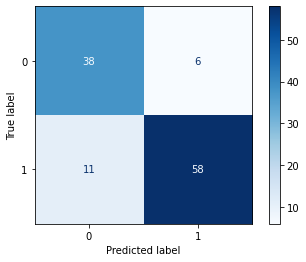

In [330]:
#Linear model
Evaluation_metrics(best_2_X_test,y_test,best_svm_lin_2,method='lin_SVM')

LOSS is 0.30
Sensitivity is 0.84
Specificity is 0.86
PPV is 0.91
NPV is 0.78
Accuracy is 0.85
F1 is 0.87
AUROC is 0.887


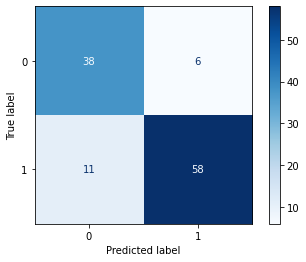

In [331]:
#non-linear models
Evaluation_metrics(best_2_X_test,y_test,best_svm_nonlin_2,'SVM')

7(e)
Theoratically speaking, we would expect to get better results for the reduced dimentionality, compared to best 2 features. Because in PCA, we find the two orthogonal vectors that carries the most information of the data, and are a linear combination of all features. While best 2 features is in some way a special case of the PCA, where the vectors are 2 features. Therefore, we would expect to have similar or better results for the dimensionality reduction. 
In our case, it is a bit tricky. Generally, PCA should be performed on a contineuos data and not binary data. The reason is that the algorithm seeks to maximize the variance. And the variance of a binary data is not as meaningful.
Our data is mostly consisted of binary data, with an additional feature that is contineous, i.e. the Age. This additional feature does add some distribution to the data and adds variance. However, since the data is mostly binary, using PCA is a bit problematic.
Looking at our results, we can see that in terms of Sensitivity, Specificity, PPV, NPV, Accuracy and F1, the results were not consistent. In some parameters PCA gave better results, while on others, best 2 features gave better results. In terms of AUROC, the PCA performed better. So in total, results are a bit ambigeous, as expected.


# THE END